In [78]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

poke = pd.read_csv('vgsales_new.csv')
#loading csv files

In [14]:
poke
# Now let's take a look at the data

,Ranks,Names,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [79]:
CompanyGrossSum = poke.groupby('Publisher')[["Global_Sales"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('Global_Sales', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['Global_Sales'] 
CompanyGrossSumSorted


Publisher
Nintendo                                  1786.56
Electronic Arts                           1110.32
Activision                                 727.46
Sony Computer Entertainment                607.50
Ubisoft                                    474.72
Take-Two Interactive                       399.54
THQ                                        340.77
Konami Digital Entertainment               283.64
Sega                                       272.99
Namco Bandai Games                         254.09
Microsoft Game Studios                     245.79
Capcom                                     200.89
Atari                                      157.22
Warner Bros. Interactive Entertainment     153.89
Square Enix                                145.18
Name: Global_Sales, dtype: float64

In [86]:
poke['Names'].drop_duplicates().sort_values(ascending=False)
poke.head()

,Ranks,Names,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [22]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in poke.columns:
    pct_missing = np.mean(poke[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Ranks - 0%
Names - 0%
Platform - 0%
Year - 2%
Genre - 0%
Publisher - 0%
NA_Sales - 0%
EU_Sales - 0%
JP_Sales - 0%
Other_Sales - 0%
Global_Sales - 0%


In [25]:
# Data Types for our columns

print(df.dtypes)

          Ranks   Names Platform     Year   Genre Publisher EU_Sales JP_Sales  \
NA_Sales                                                                        
0.00      int64  object   object  float64  object    object  float64  float64   
0.01      int64  object   object  float64  object    object  float64  float64   
0.02      int64  object   object  float64  object    object  float64  float64   
0.03      int64  object   object  float64  object    object  float64  float64   
0.04      int64  object   object  float64  object    object  float64  float64   
...         ...     ...      ...      ...     ...       ...      ...      ...   
15.85     int64  object   object  float64  object    object  float64  float64   
23.20     int64  object   object  float64  object    object  float64  float64   
26.93     int64  object   object  float64  object    object  float64  float64   
29.08     int64  object   object  float64  object    object  float64  float64   
41.49     int64  object   ob

In [26]:
print(poke.dtypes)

Ranks             int64
Names            object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object


In [87]:
poke.drop_duplicates()
poke.head()

,Ranks,Names,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [90]:
# Order our Data a little bit to see

poke.sort_values(by=['Year'], inplace=False, ascending=False)
poke.head()

,Ranks,Names,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [37]:
pd.set_option('display.max_rows', None)

In [91]:
poke['Names'].drop_duplicates().sort_values(ascending=False)
poke.head()

,Ranks,Names,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [7]:
df = poke.groupby('NA_Sales')

In [8]:
df

In [93]:
df = poke.groupby('NA_Sales')
df.head(5)

,Ranks,Names,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [94]:
df.mean()
df.head(5)

,Ranks,Names,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [12]:
df.describe()
#gives a clearer view of all aggregate

Ranks                                                       \
           count          mean          std     min      25%      50%   
NA_Sales                                                                
0.00      4499.0  11735.623694  3949.968746   215.0   9109.5  12859.0   
0.01       541.0  14235.914972  3198.990399   765.0  13851.0  15526.0   
0.02       550.0  13514.392727  2683.507259   522.0  13482.5  14478.5   
0.03       533.0  12599.410882  2280.318910   420.0  12346.0  13294.0   
0.04       525.0  11915.497143  2128.830630  1166.0  11452.0  12675.0   
...          ...           ...          ...     ...      ...      ...   
15.85        1.0      3.000000          NaN     3.0      3.0      3.0   
23.20        1.0      6.000000          NaN     6.0      6.0      6.0   
26.93        1.0     10.000000          NaN    10.0     10.0     10.0   
29.08        1.0      2.000000          NaN     2.0      2.0      2.0   
41.49        1.0      1.000000          NaN     1.0      1.0      1.0   

                              Year               ... Other_Sales        \
              75%      max   count         mean  ...         75%   max   
NA_Sales                                         ...                     
0.00      14995.5  16599.0  4439.0  2007.361568  ...        0.00  0.62   
0.01      16071.0  16600.0   526.0  2006.488593  ...        0.00  1.18   
0.02      15008.5  15856.0   536.0  2006.447761  ...        0.00  0.39   
0.03      13967.0  14736.0   526.0  2006.167300  ...        0.01  0.30   
0.04      13295.0  14072.0   520.0  2005.934615  ...        0.01  0.32   
...           ...      ...     ...          ...  ...         ...   ...   
15.85         3.0      3.0     1.0  2008.000000  ...        3.31  3.31   
23.20         6.0      6.0     1.0  1989.000000  ...        0.58  0.58   
26.93        10.0     10.0     1.0  1984.000000  ...        0.47  0.47   
29.08         2.0      2.0     1.0  1985.000000  ...        0.77  0.77   
41.49         1.0      1.0     1.0  2006.000000  ...        8.46  8.46   

         Global_Sales                                                          
                count       mean       std    min    25%    50%    75%    max  
NA_Sales                                                                       
0.00           4499.0   0.136819  0.255813   0.01   0.02   0.05   0.14   4.87  
0.01            541.0   0.069667  0.191556   0.01   0.01   0.02   0.04   2.14  
0.02            550.0   0.069055  0.174772   0.02   0.02   0.03   0.04   2.81  
0.03            533.0   0.081388  0.182970   0.03   0.04   0.05   0.06   3.22  
0.04            525.0   0.088133  0.118368   0.04   0.05   0.06   0.08   1.59  
...               ...        ...       ...    ...    ...    ...    ...    ...  
15.85             1.0  35.820000       NaN  35.82  35.82  35.82  35.82  35.82  
23.20             1.0  30.260000       NaN  30.26  30.26  30.26  30.26  30.26  
26.93             1.0  28.310000       NaN  28.31  28.31  28.31  28.31  28.31  
29.08             1.0  40.240000       NaN  40.24  40.24  40.24  40.24  40.24  
41.49             1.0  82.740000       NaN  82.74  82.74  82.74  82.74  82.74  

[409 rows x 48 columns]

In [19]:
print(df.dtypes)

          Ranks   Names Platform     Year   Genre Publisher EU_Sales JP_Sales  \
NA_Sales                                                                        
0.00      int64  object   object  float64  object    object  float64  float64   
0.01      int64  object   object  float64  object    object  float64  float64   
0.02      int64  object   object  float64  object    object  float64  float64   
0.03      int64  object   object  float64  object    object  float64  float64   
0.04      int64  object   object  float64  object    object  float64  float64   
...         ...     ...      ...      ...     ...       ...      ...      ...   
15.85     int64  object   object  float64  object    object  float64  float64   
23.20     int64  object   object  float64  object    object  float64  float64   
26.93     int64  object   object  float64  object    object  float64  float64   
29.08     int64  object   object  float64  object    object  float64  float64   
41.49     int64  object   ob

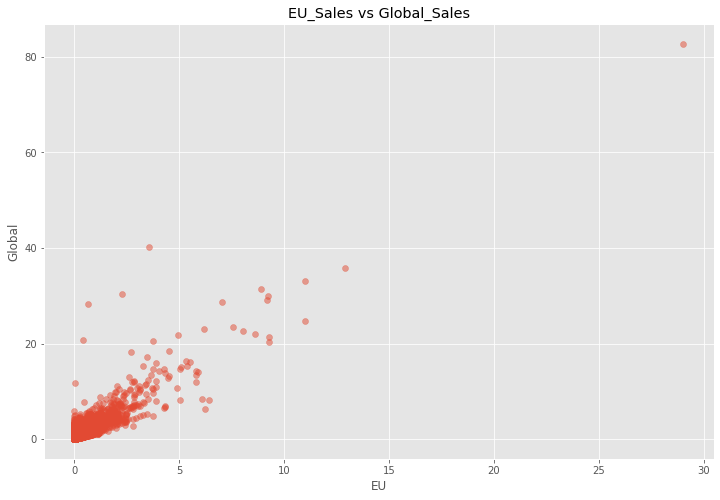

In [54]:
#using scatter plot
plt.scatter(x=poke['EU_Sales'], y=poke['Global_Sales'], alpha=0.5)
plt.title('EU_Sales vs Global_Sales')
plt.xlabel('EU')
plt.ylabel('Global')
plt.show()

<AxesSubplot:xlabel='EU_Sales', ylabel='Global_Sales'>

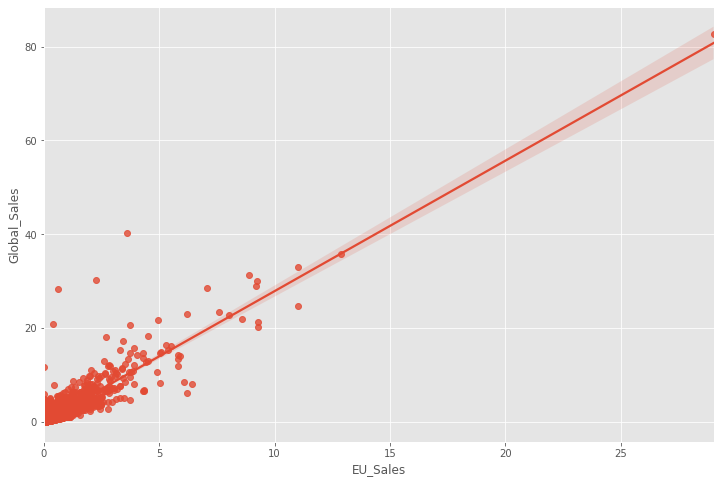

In [55]:
sns.regplot(x="EU_Sales", y="Global_Sales", data=poke)

<AxesSubplot:xlabel='EU_Sales', ylabel='Global_Sales'>

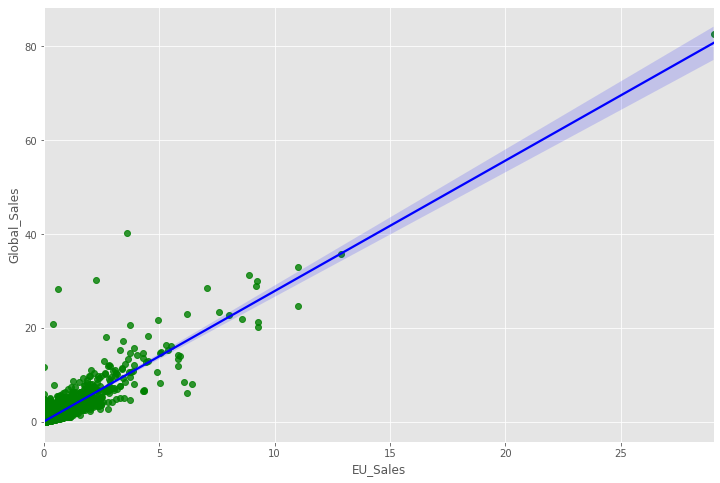

In [57]:
#plot using seaborn (colors can be used however you want)
sns.regplot(x="EU_Sales", y="Global_Sales", data=poke, scatter_kws={'color':'green'}, line_kws={'color':'blue'})

In [58]:
#Correlation only works on numerical values
#3 types of correlation : pearson(default), kendall, spearman
poke.corr()

,Ranks,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Ranks,1.000000,0.178814,-0.401362,-0.379123,-0.267785,-0.332986,-0.427407
Year,0.178814,1.000000,-0.091402,0.006014,-0.169316,0.041058,-0.074735
NA_Sales,-0.401362,-0.091402,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,-0.379123,0.006014,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,-0.267785,-0.169316,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,-0.332986,0.041058,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,-0.427407,-0.074735,0.941047,0.902836,0.611816,0.748331,1.000000


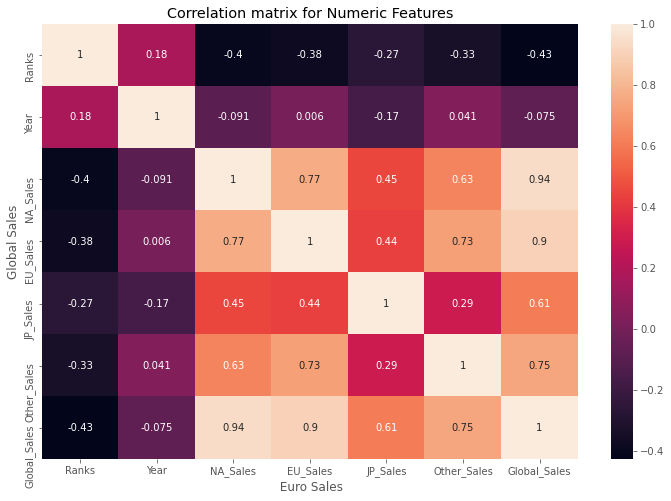

In [60]:
correlation_matrix = poke.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel(" Euro Sales")

plt.ylabel("Global Sales")

plt.show()

In [61]:
# Using factorize - this assigns a random numeric value for each unique categorical value

poke.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,Ranks,Names,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Ranks,1.000000,0.877371,0.143403,-0.045058,0.140258,0.424864,-0.208371,-0.348942,-0.184762,-0.005353,0.662138
Names,0.877371,1.000000,0.049626,-0.049600,0.166304,0.468954,-0.226233,-0.350815,-0.128186,-0.038186,0.570892
Platform,0.143403,0.049626,1.000000,0.309918,0.057640,0.087134,-0.088526,0.031088,0.004088,-0.047311,0.103271
Year,-0.045058,-0.049600,0.309918,1.000000,-0.010886,0.016743,-0.037452,0.102613,0.072313,-0.026739,-0.034156
Genre,0.140258,0.166304,0.057640,-0.010886,1.000000,0.139030,-0.082362,-0.039005,-0.014985,-0.025213,0.079653
Publisher,0.424864,0.468954,0.087134,0.016743,0.139030,1.000000,-0.168217,-0.176024,-0.042306,-0.068457,0.229734
NA_Sales,-0.208371,-0.226233,-0.088526,-0.037452,-0.082362,-0.168217,1.000000,0.227907,-0.104541,0.236589,0.122287
EU_Sales,-0.348942,-0.350815,0.031088,0.102613,-0.039005,-0.176024,0.227907,1.000000,-0.051226,0.254661,-0.019628
JP_Sales,-0.184762,-0.128186,0.004088,0.072313,-0.014985,-0.042306,-0.104541,-0.051226,1.000000,-0.038123,-0.134489
Other_Sales,-0.005353,-0.038186,-0.047311,-0.026739,-0.025213,-0.068457,0.236589,0.254661,-0.038123,1.000000,0.338563


In [95]:
#changing datatypes to numbers
poke_numerized = poke


for col_name in poke_numerized.columns:
    if(poke_numerized[col_name].dtype == 'object'):
        poke_numerized[col_name]= poke_numerized[col_name].astype('category')
        poke_numerized[col_name] = poke_numerized[col_name].cat.codes
        
poke_numerized
poke.head()

,Ranks,Names,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,11007,26,2006.0,10,359,41.49,29.02,3.77,8.46,82.74
1,2,9327,11,1985.0,4,359,29.08,3.58,6.81,0.77,40.24
2,3,5573,26,2008.0,6,359,15.85,12.88,3.79,3.31,35.82
3,4,11009,26,2009.0,10,359,15.75,11.01,3.28,2.96,33.00
4,5,7346,5,1996.0,7,359,11.27,8.89,10.22,1.00,31.37


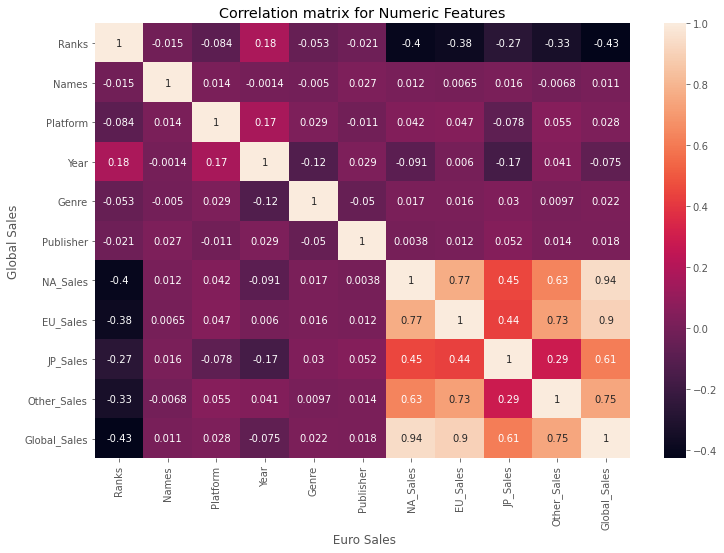

In [63]:
correlation_matrix = poke_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel(" Euro Sales")

plt.ylabel("Global Sales")

plt.show()

In [64]:
poke_numerized.corr()

,Ranks,Names,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Ranks,1.000000,-0.014656,-0.083953,0.178814,-0.053018,-0.021073,-0.401362,-0.379123,-0.267785,-0.332986,-0.427407
Names,-0.014656,1.000000,0.014418,-0.001368,-0.004989,0.027004,0.012277,0.006542,0.015945,-0.006785,0.010888
Platform,-0.083953,0.014418,1.000000,0.167823,0.029061,-0.010785,0.041536,0.047158,-0.078207,0.055061,0.028213
Year,0.178814,-0.001368,0.167823,1.000000,-0.124994,0.029479,-0.091402,0.006014,-0.169316,0.041058,-0.074735
Genre,-0.053018,-0.004989,0.029061,-0.124994,1.000000,-0.049539,0.017435,0.016481,0.030085,0.009731,0.021671
Publisher,-0.021073,0.027004,-0.010785,0.029479,-0.049539,1.000000,0.003757,0.012150,0.052035,0.014097,0.017912
NA_Sales,-0.401362,0.012277,0.041536,-0.091402,0.017435,0.003757,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,-0.379123,0.006542,0.047158,0.006014,0.016481,0.012150,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,-0.267785,0.015945,-0.078207,-0.169316,0.030085,0.052035,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,-0.332986,-0.006785,0.055061,0.041058,0.009731,0.014097,0.634737,0.726385,0.290186,1.000000,0.748331


In [67]:
correlation_mat = poke.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

Ranks         Ranks           1.000000
              Names           0.877371
              Platform        0.143403
              Year           -0.045058
              Genre           0.140258
              Publisher       0.426068
              NA_Sales       -0.208371
              EU_Sales       -0.348942
              JP_Sales       -0.184762
              Other_Sales    -0.005353
              Global_Sales    0.662138
Names         Ranks           0.877371
              Names           1.000000
              Platform        0.049626
              Year           -0.049600
              Genre           0.166304
              Publisher       0.470225
              NA_Sales       -0.226233
              EU_Sales       -0.350815
              JP_Sales       -0.128186
              Other_Sales    -0.038186
              Global_Sales    0.570892
Platform      Ranks           0.143403
              Names           0.049626
              Platform        1.000000
              Year       

In [68]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

EU_Sales      Names          -0.350815
Names         EU_Sales       -0.350815
EU_Sales      Ranks          -0.348942
Ranks         EU_Sales       -0.348942
NA_Sales      Names          -0.226233
Names         NA_Sales       -0.226233
Ranks         NA_Sales       -0.208371
NA_Sales      Ranks          -0.208371
JP_Sales      Ranks          -0.184762
Ranks         JP_Sales       -0.184762
EU_Sales      Publisher      -0.176138
Publisher     EU_Sales       -0.176138
              NA_Sales       -0.168353
NA_Sales      Publisher      -0.168353
Global_Sales  JP_Sales       -0.134489
JP_Sales      Global_Sales   -0.134489
Names         JP_Sales       -0.128186
JP_Sales      Names          -0.128186
NA_Sales      JP_Sales       -0.104541
JP_Sales      NA_Sales       -0.104541
Platform      NA_Sales       -0.088526
NA_Sales      Platform       -0.088526
Genre         NA_Sales       -0.082362
NA_Sales      Genre          -0.082362
Publisher     Other_Sales    -0.068665
Other_Sales   Publisher  

In [80]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = poke.groupby('Names')[["Global_Sales"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('Global_Sales', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['Global_Sales'].astype('int64') 
CompanyGrossSumSorted


Names
Wii Sports                        82
Grand Theft Auto V                55
Super Mario Bros.                 45
Tetris                            35
Mario Kart Wii                    35
Wii Sports Resort                 33
Pokemon Red/Pokemon Blue          31
Call of Duty: Black Ops           31
Call of Duty: Modern Warfare 3    30
New Super Mario Bros.             30
Call of Duty: Black Ops II        29
Wii Play                          29
New Super Mario Bros. Wii         28
Duck Hunt                         28
Call of Duty: Ghosts              27
Name: Global_Sales, dtype: int64

In [96]:
poke.groupby(['Names', 'Year'])[["Global_Sales"]].sum()
poke.head()

,Ranks,Names,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,11007,26,2006.0,10,359,41.49,29.02,3.77,8.46,82.74
1,2,9327,11,1985.0,4,359,29.08,3.58,6.81,0.77,40.24
2,3,5573,26,2008.0,6,359,15.85,12.88,3.79,3.31,35.82
3,4,11009,26,2009.0,10,359,15.75,11.01,3.28,2.96,33.00
4,5,7346,5,1996.0,7,359,11.27,8.89,10.22,1.00,31.37


In [97]:
poke.to_csv('vgsales_modified.csv')